
=== Iris) ===
Размер датасета: 150 примеров, 4 признаков
Распределение классов:
  setosa: 50
  versicolor: 50
  virginica: 50
Пропущенных значений: Нет (0)

=== Wine ===
Размер датасета: 178 примеров, 13 признаков
Распределение классов:
  class_0: 59
  class_1: 71
  class_2: 48
Пропущенных значений: Нет (0)

=== Breast Cancer ===
Размер датасета: 569 примеров, 30 признаков
Распределение классов:
  malignant: 212
  benign: 357
Пропущенных значений: Нет (0)

=== Гистограммы для Iris (2 признака) ===


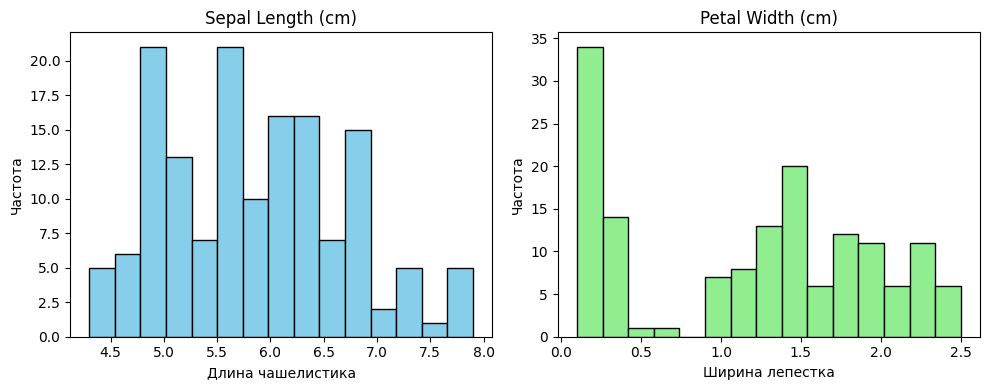

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import matplotlib.pyplot as plt


iris = load_iris(as_frame=True)
wine = load_wine(as_frame=True)
breast_cancer = load_breast_cancer(as_frame=True)

datasets = {
    'Iris': iris,
    'Wine': wine,
    'Breast Cancer': breast_cancer
}

for name, dataset in datasets.items():
    df = dataset.frame
    X = dataset.data
    y = dataset.target

    n_samples, n_features = X.shape
    class_counts = y.value_counts().sort_index()
    missing = df.isnull().sum().sum()

    print(f"\n=== {name} ===")
    print(f"Размер датасета: {n_samples} примеров, {n_features} признаков")
    print("Распределение классов:")
    for cls, count in class_counts.items():
        class_name = dataset.target_names[cls] if hasattr(dataset, 'target_names') else cls
        print(f"  {class_name}: {count}")
    print(f"Пропущенных значений: {'Да' if missing > 0 else 'Нет'} ({missing})")

# Построение гистограмм для датасета Iris (ботанический сад)
print("\n=== Гистограммы для Iris (2 признака) ===")
plt.figure(figsize=(10, 4))

# Признак 1: sepal length
plt.subplot(1, 2, 1)
plt.hist(iris.data['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Sepal Length (cm)')
plt.xlabel('Длина чашелистика')
plt.ylabel('Частота')

# Признак 2: petal width
plt.subplot(1, 2, 2)
plt.hist(iris.data['petal width (cm)'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Petal Width (cm)')
plt.xlabel('Ширина лепестка')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Таблица результатов:
      Dataset               Model  train_accuracy  test_accuracy  training_time
        Iris) Logistic Regression          0.9810         0.9111         0.0700
        Iris)          SVM Linear          0.9714         0.9111         0.0240
        Iris)             SVM RBF          0.9714         0.9333         0.0196
        Iris)       Decision Tree          1.0000         0.9333         0.0189
         Wine Logistic Regression          1.0000         0.9815         0.0926
         Wine          SVM Linear          1.0000         0.9630         0.0111
         Wine             SVM RBF          1.0000         0.9815         0.0114
         Wine       Decision Tree          1.0000         0.9630         0.0121
Breast Cancer Logistic Regression          0.9874         0.9883         0.0766
Breast Cancer          SVM Linear          0.9899         0.9825         0.0125
Breast Cancer             SVM RBF          0.9824         0.9766         0.0174
Breast Cancer      

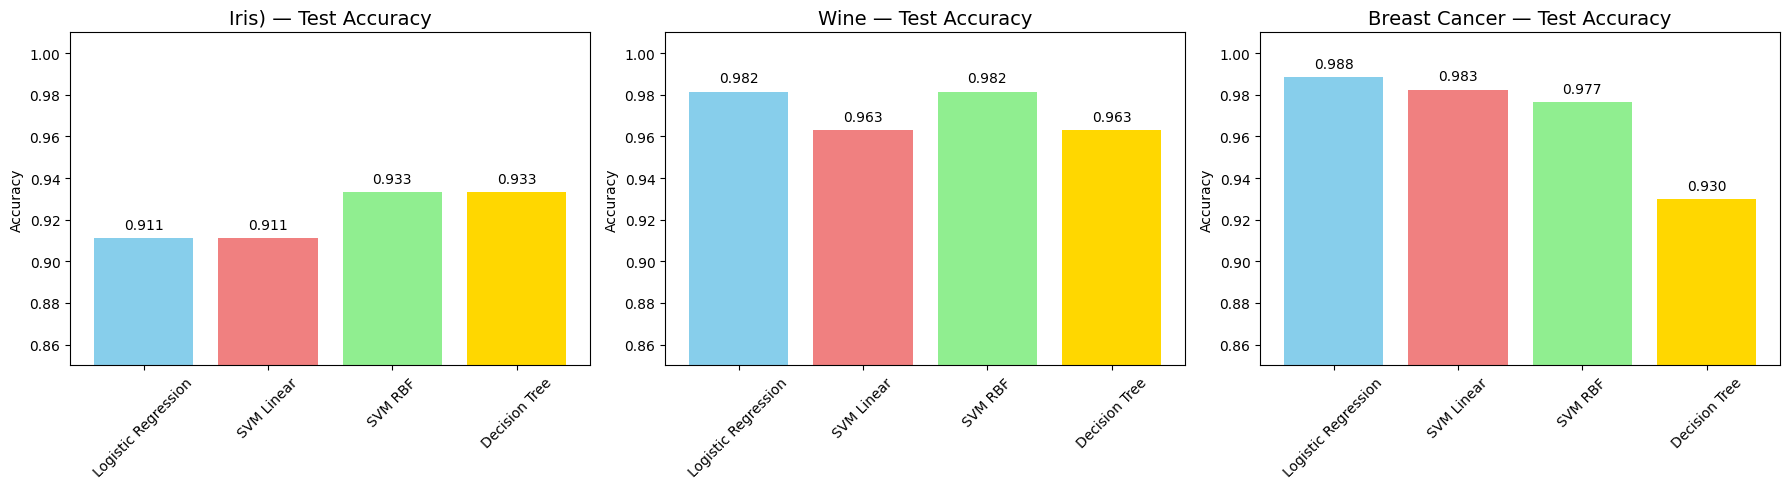

In [2]:
# Хранение результатов
results = []

# Обработка каждого датасета
for dataset_name, dataset in datasets.items():
    X, y = dataset.data, dataset.target

    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Масштабирование данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Определение моделей
    models_config = [
        ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
        ("SVM Linear", SVC(kernel='linear', random_state=42)),
        ("SVM RBF", SVC(kernel='rbf', random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(max_depth=5, random_state=42))
    ]

    for model_name, model in models_config:
        # Выбор данных: масштабированные или нет
        if model_name in ["Logistic Regression", "SVM Linear", "SVM RBF"]:
            X_tr, X_te = X_train_scaled, X_test_scaled
        else:
            X_tr, X_te = X_train, X_test

        # Замер времени обучения
        start = time.time()
        model.fit(X_tr, y_train)
        train_time = time.time() - start

        # Точность
        train_acc = accuracy_score(y_train, model.predict(X_tr))
        test_acc = accuracy_score(y_test, model.predict(X_te))

        # Сохранение результата
        results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "train_accuracy": round(train_acc, 4),
            "test_accuracy": round(test_acc, 4),
            "training_time": round(train_time, 4)
        })

# Создание таблицы
df = pd.DataFrame(results)
print("Таблица результатов:")
print(df.to_string(index=False))

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
model_names = ["Logistic Regression", "SVM Linear", "SVM RBF", "Decision Tree"]

for i, (ds_name, ax) in enumerate(zip(datasets.keys(), axes)):
    subset = df[df["Dataset"] == ds_name]
    test_accs = [subset[subset["Model"] == m]["test_accuracy"].values[0] for m in model_names]

    bars = ax.bar(model_names, test_accs, color=colors)
    ax.set_title(f'{ds_name} — Test Accuracy', fontsize=14)
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0.85, 1.01)
    ax.tick_params(axis='x', rotation=45)

    # Подписи значений
    for bar, acc in zip(bars, test_accs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.003,
                f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Лучшие модели по датасетам:
• Iris): SVM RBF — Accuracy = 0.9333
• Wine: Logistic Regression — Accuracy = 0.9815
• Breast Cancer: Logistic Regression — Accuracy = 0.9883


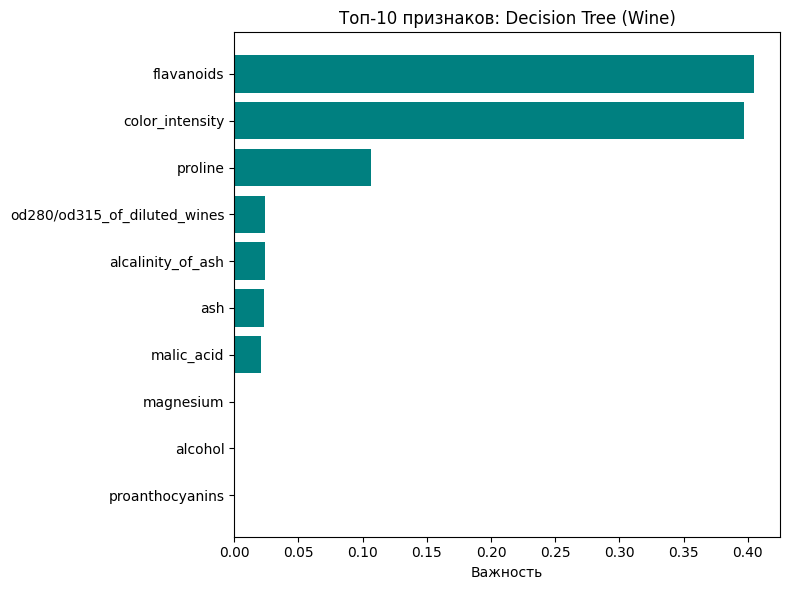

Три самых важных признака:
7. flavanoids — 0.405
10. color_intensity — 0.397
13. proline — 0.107


In [3]:
# Вывод лучших моделей
print("\nЛучшие модели по датасетам:")
for ds_name in datasets.keys():
    subset = df[df["Dataset"] == ds_name]
    best_row = subset.loc[subset["test_accuracy"].idxmax()]
    print(f"• {ds_name}: {best_row['Model']} — Accuracy = {best_row['test_accuracy']:.4f}")


data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42, stratify=data.target
)

# Обучение дерева
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Важность признаков
df_imp = pd.DataFrame({
    'feature': data.feature_names,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

# Топ-10
top10 = df_imp.head(10)

# График
plt.figure(figsize=(8, 6))
plt.barh(top10['feature'][::-1], top10['importance'][::-1], color='teal')
plt.xlabel('Важность')
plt.title('Топ-10 признаков: Decision Tree (Wine)')
plt.tight_layout()
plt.show()

# Вывод
print("Три самых важных признака:")
for i, row in top10.head(3).iterrows():
    print(f"{i+1}. {row['feature']} — {row['importance']:.3f}")


1) На мой взгляд все модели показали примерно одинаковые результаты.
2) Я думаю что на результат повлияло большое количество примеров и признаков.
3) Модели SVM обучались относительно быстрее чем Decision Tree и Logistic Regression.
4) Для интерпретируемости лучше подойдет модель Decision Tree, для точности - SVM.
5) Если зависимость простая и линейная, то лучше подойдет Logistic Regression, если зависимость более сложная, то можно использовать SVM или Decision Tree.